In [2]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd

from time import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as ply
from sklearn.externals import joblib

In [4]:
tiempoInicio = time()
models_path = r'C:\Users\Juanma\Documents\modelos'
sav_X_train = models_path + r'\RRX_train.sav'
X_train = joblib.load(sav_X_train)
sav_y_train = models_path + r'\RRy_train.sav'
y_train = joblib.load(sav_y_train)
sav_X_test = models_path + r'\RRX_test.sav'
X_test = joblib.load(sav_X_test)
sav_y_test = models_path + r'\RRy_test.sav'
y_test = joblib.load(sav_y_test)
print("Tiempo final: ",str(time()-tiempoInicio))  # 4088 fotos ->  0.24434423446655273 s
#                               Maxima calidad     21308 fotos -> 25.211358308792114   s
#                               168 x 300          21308 fotos ->  4.091064214706421   s
#                     np.array  168 x 300          21308 fotos ->  4.091064214706421   s

Tiempo final:  0.20345497131347656


In [5]:
str(len(X_train[0][0]))+'x'+str(len(X_test[0]))

'100x56'

In [6]:
print(X_train[0][0][0])
type(X_train[0])

[93 92 82]


numpy.ndarray

In [7]:
len(y_train)

2601

X_train y test son arrays de numpy de valores por encima de uno. Hay que normalizarlos:

In [8]:
X_train_norm_v1 = [x/255 for x in X_train]
X_test_norm_v1 = [x/255 for x in X_test]

In [9]:
len(X_train)

2601

import matplotlib.pyplot as ply

print('Longitud del conjunto de fotos de train: ',len(X_train))

print('Longitud del conjunto de fotos de test:   ',len(X_test))

print('Tamaño de cada imagen: \t\t\t   ',X_train[0].shape[0],'x',X_train[0].shape[1])

y_train_num = []

y_test_num = []

num_vacia_test,num_vacia_train,num_congestionada_train,num_congestionada_test,num_atascada_train,num_atascada_test=0,0,0,0,0,0


for etiqueta in y_test:

    if etiqueta=='vacia':
        num_vacia_test += 1
        y_test_num.append(0)
    elif etiqueta=='congestionada':
        num_congestionada_test += 1
        y_test_num.append(1)
    elif etiqueta == 'atascada':
        num_atascada_test +=1
        y_test_num.append(2)

for etiqueta in y_train:
    
    if etiqueta=='vacia':
        num_vacia_train += 1
        y_train_num.append(0)
    elif etiqueta=='congestionada':
        num_congestionada_train += 1
        y_train_num.append(1)
    elif etiqueta == 'atascada':
        num_atascada_train +=1
        y_train_num.append(2)

print('0 - carreteras vacias - ',str(num_vacia_train),'- congestionadas -', str(num_vacia_train+num_congestionada_train),'- atascadas -', str(num_vacia_train+num_congestionada_train+num_atascada_train))

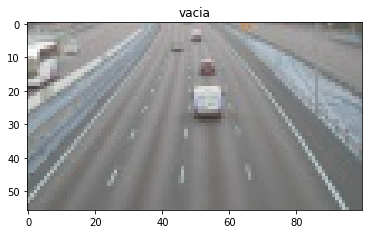

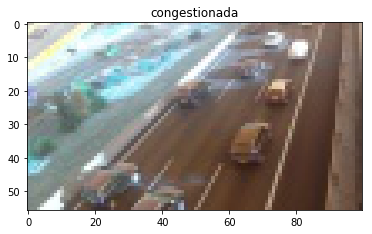

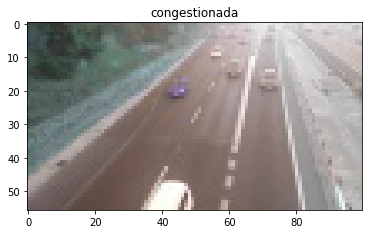

In [10]:
ply.imshow(X_train[10])
ply.title(y_train[10])
ply.show()
ply.imshow(X_train[1611])
ply.title(y_train[1611])
ply.show()
ply.imshow(X_train[2600])
ply.title(y_train[2600])
ply.show()

## Normalizacion de los datos presentes en la foto

In [11]:
y_train_num = []
y_test_num = []
y_train_atascadas,y_train_vacias,y_train_congestionadas = 0,0,0
y_test_atascadas,y_test_vacias,y_test_congestionadas = 0,0,0

for y in y_train:
    if y[0]=='v':
        y_train_num.append(0)
        y_train_vacias += 1
    elif y[0]=='c':
        y_train_num.append(1)
        y_train_congestionadas +=1
    elif y[0]=='a':
        y_train_num.append(2)
        y_train_atascadas += 1
for y in y_test:
    if y[0]=='v':
        y_test_num.append(0)
        y_test_vacias += 1
    elif y[0]=='c':
        y_test_num.append(1)
        y_test_congestionadas += 1
    elif y[0]=='a':
        y_test_num.append(2)
        y_test_atascadas += 1
y_train = np.array(y_train_num)
y_test = np.array(y_test_num)

1096 1505 0
122 167 1198


In [3]:
# Definimos el modelo
num_classes=3
def gen_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(56,100,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # Construimos el modelo
model = gen_model()

In [13]:
inicio = time()
model.fit(np.array(X_train_norm_v1), y_train, batch_size=50, epochs=100,verbose=1)
total = time()-inicio

Epoch 1/100
2601/2601 [==============================] - 3s 998us/step - loss: 0.2205 - acc: 0.9066
Epoch 2/100
2601/2601 [==============================] - 1s 254us/step - loss: 0.0274 - acc: 0.9938
Epoch 3/100
2601/2601 [==============================] - 1s 249us/step - loss: 0.0265 - acc: 0.9931
Epoch 4/100
2601/2601 [==============================] - 1s 249us/step - loss: 0.0067 - acc: 0.9992
Epoch 5/100
2601/2601 [==============================] - 1s 247us/step - loss: 0.0032 - acc: 1.0000
Epoch 6/100
2601/2601 [==============================] - 1s 244us/step - loss: 0.0020 - acc: 1.0000
Epoch 7/100
2601/2601 [==============================] - 1s 248us/step - loss: 0.0018 - acc: 1.0000
Epoch 8/100
2601/2601 [==============================] - 1s 243us/step - loss: 0.0015 - acc: 1.0000
Epoch 9/100
2601/2601 [==============================] - 1s 246us/step - loss: 9.2634e-04 - acc: 1.0000
Epoch 10/100
2601/2601 [==============================] - 1s 246us/step - loss: 7.0247e-04 - acc

In [14]:
score = model.evaluate(np.array(X_test_norm_v1), y_test_num, batch_size=30)

1487/1487 [==============================] - 0s 199us/step


In [15]:
print('Score : '+str(score))
print(str(len(X_train))+' fotos de train y '+str(len(X_test))+' fotos de test')
print('Tiempo total: '+str(total)+' s')

Score : [12.985535337016659, 0.19435104220684696]
2601 fotos de train y 1487 fotos de test
Tiempo total: 67.21314859390259 s


A la vista del score obtenido, no comprendo como ha dado tan bajo el accuracy, si en el entrenamiento está en 1. Estudiando las etiquetas presentes en los conjuntos de test y de train, ya puedo entenderlo un poco

In [16]:
print(y_train_vacias,y_train_congestionadas,y_train_atascadas)
print(y_test_vacias,y_test_congestionadas,y_test_atascadas)

1096 1505 0
122 167 1198


Al tener esta lista precargada en una estructura disponible para su uso rápido, voy a optar por borrar estas estructuras .sav y volverlas a crear

In [17]:
ruta_fotos = r'D:/modelos/datos/'
X_train = []
y_train = []
X_test = []
y_test = []

num_vacia_test,num_vacia_train,num_congestionada_train,num_congestionada_test,num_atascada_train,num_atascada_test=0,0,0,0,0,0

tiempoInicio = time()
count=0
yourpath = ruta_fotos + r'vacia_168x300/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%10==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append(0)
            num_vacia_test += 1
        else:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append(0)
            num_vacia_train += 1
        count += 1

yourpath = ruta_fotos + r'congestionada_168x300/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%10==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append(1)
            num_congestionada_test += 1
        else:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append(1)
            num_congestionada_train += 1
        count += 1

yourpath = ruta_fotos + r'atascada_168x300/'
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        if count%10==0:
            imagen = cv2.imread(yourpath+name)
            X_test.append(imagen)
            y_test.append(2)
            num_atascada_test += 1
        else:
            imagen = cv2.imread(yourpath+name)
            X_train.append(imagen)
            y_train.append(2)
            num_atascada_train += 1
        count += 1
print("Tiempo final: ",str(time()-tiempoInicio))

Tiempo final:  32.06831479072571


In [25]:
X_train_array = np.array(X_train)/255
X_test_array = np.array(X_test)/255
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

In [31]:
#ruta_fotos
joblib.dump(X_train_array,ruta_fotos + r'RRX_train_ok_array.sav')  # 16.5 GB
joblib.dump(X_test_array,ruta_fotos + r'RRX_test_ok_array.sav')    #  1.9 GB
joblib.dump(y_train_array,ruta_fotos + r'RRy_train_ok.sav')        # 57.5 KB
joblib.dump(y_test_array,ruta_fotos + r'RRy_test_ok.sav')          #  6.6 KB
joblib.dump(X_train,ruta_fotos + r'RRX_train_ok_list.sav')         #  2.1 GB
joblib.dump(X_test,ruta_fotos + r'RRX_test_ok_list.sav')           #235   MB
joblib.dump(y_train,ruta_fotos + r'RRy_train_ok2.sav')             # 29   KB
joblib.dump(y_test,ruta_fotos + r'RRy_test_ok2.sav')               #  4   KB

['D:/modelos/datos/RRy_test_ok2.sav']

A la vista de este simple ejercicio de guardado de la información para volver a utilizarla, puedo afirmar dos cuestiones:
    
    Los datos en forma de np.array pesa demasiado, lo cual es normal si le estoy diciendo que me guarde una lista con decimales frente a una lista con enteros de hasta tres digitos
    
    Los datos en forma de np.array tarda demasiado en ser utilizada (guardado y carga), por lo que no se puede apreciar las ventajas de guardarlo directamente como np.array normalizado. Mantendremos la estructura de listas en el futuro.

In [4]:
ruta_fotos = r'D:\modelos\datos\\'
tiempoInicio = time()
sav_X_train = ruta_fotos + r'RRX_train_ok_list.sav'
X_train = joblib.load(sav_X_train)
sav_y_train = ruta_fotos + r'RRy_train_ok2.sav'
y_train = joblib.load(sav_y_train)
sav_X_test = ruta_fotos + r'RRX_test_ok_list.sav'
X_test = joblib.load(sav_X_test)
sav_y_test = ruta_fotos + r'RRy_test_ok2.sav'
y_test = joblib.load(sav_y_test)
print("Tiempo final: ",str(time()-tiempoInicio))  # 4088 fotos ->  0.24434423446655273 s
#                               Maxima calidad     21308 fotos -> 25.211358308792114   s
#                               168 x 300          21308 fotos ->  4.091064214706421   s
#                     np.array  168 x 300          21308 fotos ->  ERROR               s
#                     list      168 x 300  en D:   21308 fotos ->  5.790594577789307   s

Tiempo final:  2.017601490020752


In [ ]:
inicio = time()
model.fit(np.array(X_train)/255, np.array(y_train), batch_size=50, epochs=100,verbose=1)
total = time()-inicio

ValueError: Error when checking input: expected conv2d_1_input to have shape (56, 100, 3) but got array with shape (168, 300, 3)

He metido fotos de un tamaño incorrecto. Redimensiono las imagenes

In [2]:
from procesado_fotos import reshape_list_of_photos
import os
import cv2
import pickle
import numpy as np
import pandas as pd

from time import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as ply
from sklearn.externals import joblib

In [3]:
# Definimos el modelo
num_classes=3
def gen_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(56,100,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# # Construimos el modelo
model = gen_model()

In [4]:
ruta_fotos = r'D:\modelos\datos\\'
tiempoInicio = time()
sav_X_train = ruta_fotos + r'RRX_train_ok_list.sav'
X_train = joblib.load(sav_X_train)
sav_y_train = ruta_fotos + r'RRy_train_ok2.sav'
y_train = joblib.load(sav_y_train)
sav_X_test = ruta_fotos + r'RRX_test_ok_list.sav'
X_test = joblib.load(sav_X_test)
sav_y_test = ruta_fotos + r'RRy_test_ok2.sav'
y_test = joblib.load(sav_y_test)
print("Tiempo final: ",str(time()-tiempoInicio))  # 4088 fotos ->  0.24434423446655273 s
#                               Maxima calidad     21308 fotos -> 25.211358308792114   s
#                               168 x 300          21308 fotos ->  4.091064214706421   s
#                     np.array  168 x 300          21308 fotos ->  ERROR               s
#                     list      168 x 300  en D:   21308 fotos ->  5.790594577789307   s

Tiempo final:  1.9897043704986572


In [5]:
X_train_list = [cv2.resize(x,(100,56), interpolation=cv2.INTER_AREA) for x in X_train]
X_test_list  = [cv2.resize(x,(100,56), interpolation=cv2.INTER_AREA) for x in  X_test]

Y vuelvo a entrenar el modelo

In [9]:
inicio = time()
model.fit(np.array(X_train_list)/255, np.array(y_train), batch_size=50, epochs=100,verbose=1)
total = time()-inicio

Epoch 1/100
14683/14683 [==============================] - 7s 443us/step - loss: 0.2193 - acc: 0.9260
Epoch 2/100
14683/14683 [==============================] - 4s 247us/step - loss: 0.0397 - acc: 0.9907
Epoch 3/100
14683/14683 [==============================] - 4s 245us/step - loss: 0.0258 - acc: 0.9935
Epoch 4/100
14683/14683 [==============================] - 4s 245us/step - loss: 0.0224 - acc: 0.9937
Epoch 5/100
14683/14683 [==============================] - 4s 246us/step - loss: 0.0215 - acc: 0.9936
Epoch 6/100
14683/14683 [==============================] - 4s 246us/step - loss: 0.0197 - acc: 0.9940
Epoch 7/100
14683/14683 [==============================] - 4s 244us/step - loss: 0.0139 - acc: 0.9955 0s - loss: 0.0136 - acc: 0.99
Epoch 8/100
14683/14683 [==============================] - 4s 247us/step - loss: 0.0210 - acc: 0.9937
Epoch 9/100
14683/14683 [==============================] - 4s 245us/step - loss: 0.0152 - acc: 0.9952
Epoch 10/100
14683/14683 [==========================

14683/14683 [==============================] - 4s 246us/step - loss: 0.0045 - acc: 0.9981
Epoch 80/100
14683/14683 [==============================] - 4s 245us/step - loss: 0.0069 - acc: 0.9967
Epoch 81/100
14683/14683 [==============================] - 4s 247us/step - loss: 0.0048 - acc: 0.9979
Epoch 82/100
14683/14683 [==============================] - 4s 250us/step - loss: 0.0046 - acc: 0.9983
Epoch 83/100
14683/14683 [==============================] - 4s 247us/step - loss: 0.0042 - acc: 0.9980
Epoch 84/100
14683/14683 [==============================] - 4s 246us/step - loss: 0.0076 - acc: 0.9972
Epoch 85/100
14683/14683 [==============================] - 4s 246us/step - loss: 0.0054 - acc: 0.9978
Epoch 86/100
14683/14683 [==============================] - 4s 250us/step - loss: 0.0039 - acc: 0.9983
Epoch 87/100
14683/14683 [==============================] - 4s 249us/step - loss: 0.0040 - acc: 0.9984
Epoch 88/100
14683/14683 [==============================] - 4s 248us/step - loss: 0.00

In [16]:
score = model.evaluate(np.array(X_test_list)/255, np.array(y_test), batch_size=50)

print('Score : '+str(score))
print('Fotos de train '+str(len(X_train))+' y test '+str(len(X_test)))
print('Resolucion: '+str(len(X_train_list[0][0]))+'x'+str(len(X_train_list[0])))
print('Tiempo total: '+str(total)+' s')

1632/1632 [==============================] - 0s 170us/step
Score : [0.01254532529703235, 0.9975490219452802]
Fotos de train 14683 y test 1632
Resolucion: 100x56
Tiempo total: 366.7029001712799 s


In [19]:
predicciones = model.predict_classes(np.array(X_test_list)/255, batch_size=50)

type(predicciones)

numpy.ndarray

In [20]:
predicciones

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test,list(predicciones))#,labels=['Vacia','Congestionada','Atascada'])

In [28]:
mc

array([[487,   0,   0],
       [  0, 553,   4],
       [  0,   0, 588]], dtype=int64)

Confusion matrix, without normalization
[[487   0   0]
 [  0 553   4]
 [  0   0 588]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.99 0.01]
 [0.   0.   1.  ]]


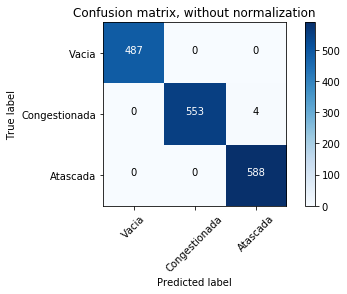

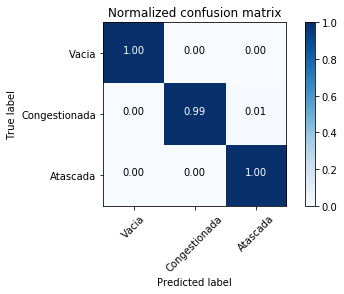

In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)
class_names = ['Vacia','Congestionada','Atascada']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(mc, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(mc, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Obtenemos unos resultados mejor de lo esperado. En futuras entregas, intentaremos rotar las imagenes para intentar que el modelo nos prediga (aunque si bien peor) más casos posibles para las mismas etiquetas